<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/regression_transformations_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [57]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Read In Data Set**

In [65]:
df = pd.read_csv('/content/business-analytics/datasets/CASchools.csv')
df['Students_per_Teacher'] = df['students'] / df['teachers']
df.sort_values(by='Students_per_Teacher', ascending=False)
df.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,Students_per_Teacher
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329


In [66]:
rhs_var = 'income'
dep_var = 'math'

### **Linear Model 1**

In [67]:
linear_model1 = smf.ols(f'{dep_var} ~ {rhs_var}', data=df)
results1 = linear_model1.fit()

### **Linear Model 2**

In [68]:
linear_model2 = smf.ols(f'{dep_var} ~ {rhs_var} + I({rhs_var} **2)', data=df)
results2 = linear_model2.fit()

### **Linear Model 3**

In [69]:
linear_model3 = smf.ols(f'{dep_var} ~ {rhs_var} + I({rhs_var} **2) + I({rhs_var} **3) ', data=df)
results3 = linear_model3.fit()

### **Summarize Results**

In [70]:
summary_col([results1, results2, results3])

,math I,math II,math III
Intercept,625.5395,610.3464,607.2301
,(1.5363),(3.1033),(5.9511)
income,1.8152,3.4726,3.9764
,(0.0907),(0.3100),(0.8774)
I(income ** 2),,-0.0355,-0.0586
,,(0.0064),(0.0381)
I(income ** 3),,,0.0003
,,,(0.0005)
R-squared,0.4892,0.5246,0.5250
R-squared Adj.,0.4879,0.5223,0.5216


### **Plot**

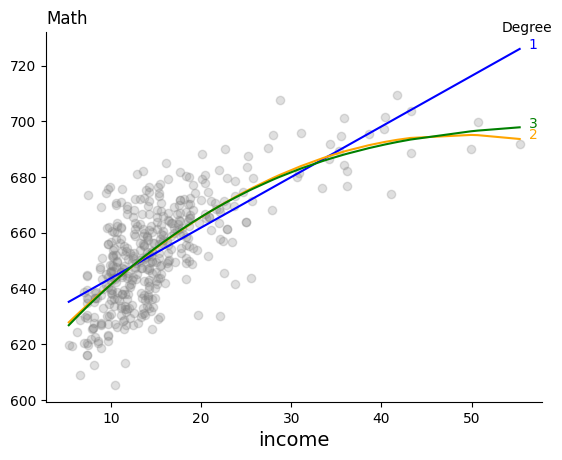

In [85]:
# Sort the values by the independent variable (rhs_var)
sorted_indices = np.argsort(df[rhs_var])  # Get indices that would sort rhs_var
sorted_x = df[rhs_var].iloc[sorted_indices]  # Sort the x-values
sorted_fitted1 = results1.fittedvalues.iloc[sorted_indices]  # Sort fitted values for model 1
sorted_fitted2 = results2.fittedvalues.iloc[sorted_indices]  # Sort fitted values for model 2
sorted_fitted3 = results3.fittedvalues.iloc[sorted_indices]  # Sort fitted values for model 3

# Scatter plot of the data points
plt.scatter(df[rhs_var], df[dep_var],color='grey', alpha=0.25)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Plot the fitted lines
ax.plot(sorted_x, sorted_fitted1, color='blue')
ax.plot(sorted_x, sorted_fitted2, color='orange')
ax.plot(sorted_x, sorted_fitted3, color='green')

# Add text annotations near the end of each line
ax.text(sorted_x.iloc[-1] + 1, sorted_fitted1.iloc[-1], '1', color='blue', fontsize=10)
ax.text(sorted_x.iloc[-1] + 1, sorted_fitted2.iloc[-1], '2', color='orange', fontsize=10)
ax.text(sorted_x.iloc[-1] + 1, sorted_fitted3.iloc[-1], '3', color='green', fontsize=10)
ax.text(sorted_x.iloc[-1] -2, sorted_fitted1.iloc[-1] + 6, 'Degree', color='black', fontsize=10)


# Add legend and labels)
plt.xlabel(rhs_var, size=14)
plt.title('Math', loc='left')

plt.show()